# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

https://sites.google.com/site/timeserieschain/

In [1]:
# SETUP
import stumpy
import helper.testdata as testdata
import helper.visualize as visualize
import helper.results as results

## Hemodynamics Data ##
Ground Truth: Chains are changes in arterial blood pressure (ABP). Therefore m=200, as this is the typical length of an ABP signal.

In [2]:
# SETUP
use_case = "chains"
data_name = "hemodynamics"
T = testdata.load_from_txt("../data/" + use_case + "/" + data_name + ".txt")

### stumpy without dilation ###

In [3]:
# SETUP for stumpy without dilation
m = 200 # target for ABP
d = 1

file_name = data_name + "_d" + str(d) + "_m" + str(m)
file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

In [4]:
# calculate:
mp = stumpy.stump(T, m=m)
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
results.save([T, m, d, mp, all_chain_set, unanchored_chain], file_path + ".npy")

 File already exists, not saving. 


/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)


[  608  1615  1817 17674 18272 18476 22376 23812 24635]


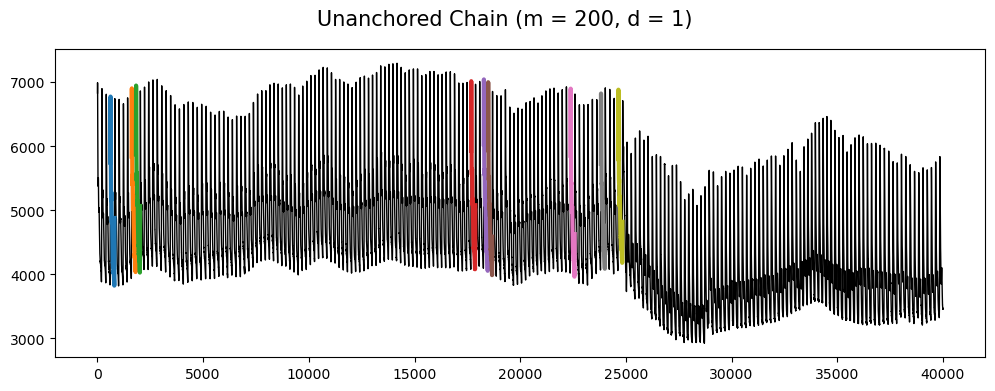

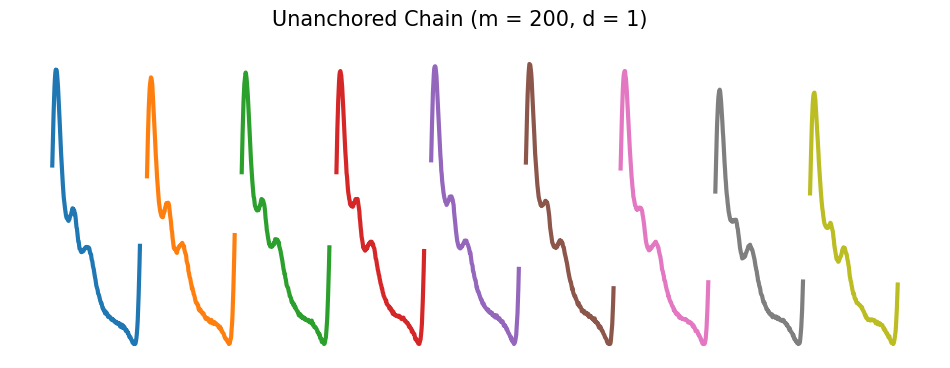

In [5]:
# visualize:
T, m, d, mp, all_chain_set, unanchored_chain = results.load(file_path + ".npy")
print(unanchored_chain)
plot = visualize.chain_unanchored(T, unanchored_chain, m, d)
plot.savefig(file_path + "_unanchored")
plot = visualize.chain_unanchored_snippets(T, unanchored_chain, m, d)
plot.savefig(file_path + "_unanchored_snippets")

### stumpy with dilation ###

In [6]:
# SETUP for stumpy with dilation
target_r = 200 # target for ABP
ds = [2,3,4,5,6,7,8]

In [7]:
# calculate
for d in ds:
    m = round((target_r-1)/d) + 1
    file_name =  data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    mp = stumpy.stump_dil(T, m=m, d=d)
    all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
    
    results.save([T, m, d, mp, all_chain_set, unanchored_chain], file_path + ".npy")

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', '

 File already exists, not saving. 
 File already exists, not saving. 
 File already exists, not saving. 
 File already exists, not saving. 
 File already exists, not saving. 
 File already exists, not saving. 
 File already exists, not saving. 


[  606  1613  1815 17672 18270 18474 22374 23810 24633]
[  608  1615  1817 17674 18272 18476 22376 23812 24635]
[1492 1694 2489 6449 6652 6854 7637 8220 8417]
[1493 1695 2490 6450 6653 6855 7638 8221 8418]
[  606  1613  1815 17672 18270 18474 22374 23810 24633]
[1590 5106 5730 6750 6952 7343 7538 7735 8318 8515]
[1540 1742 2537 2743 2955 5476 6094 6902 7685 8268 8465]


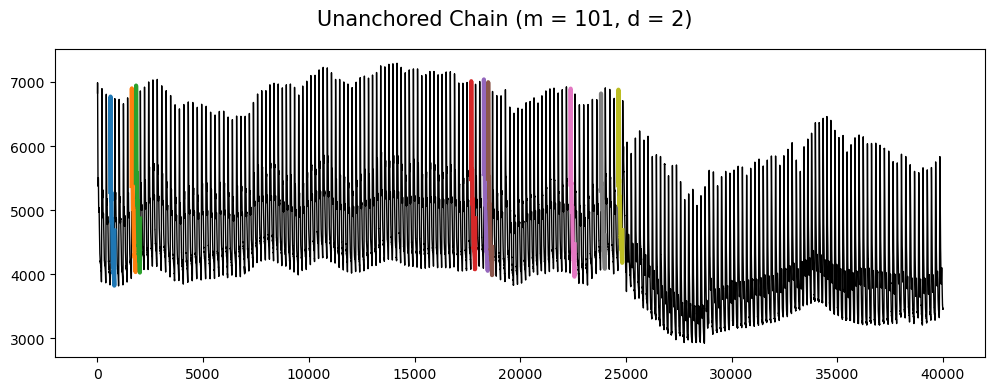

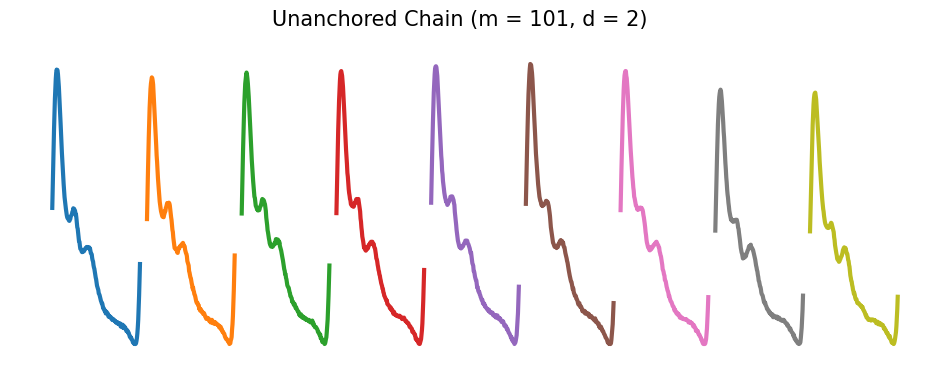

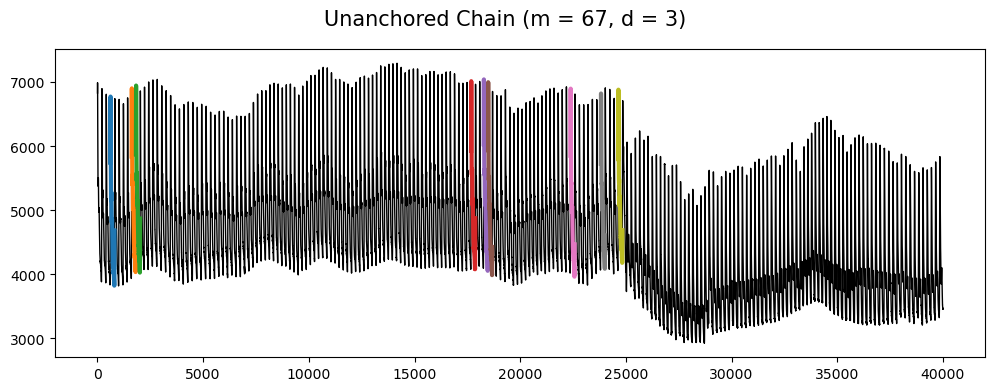

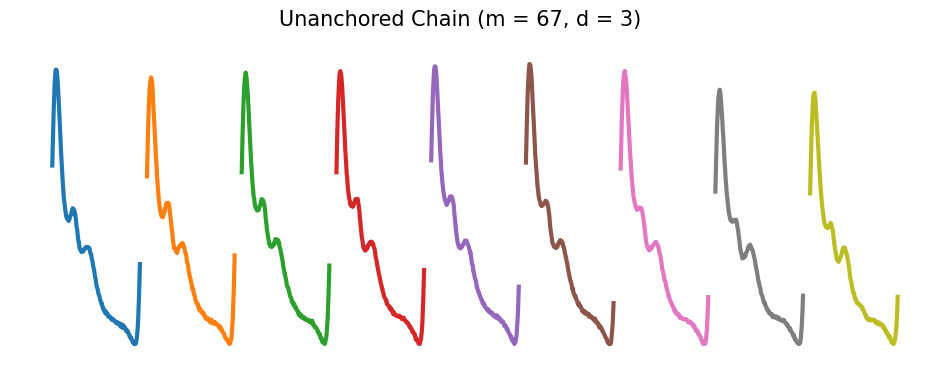

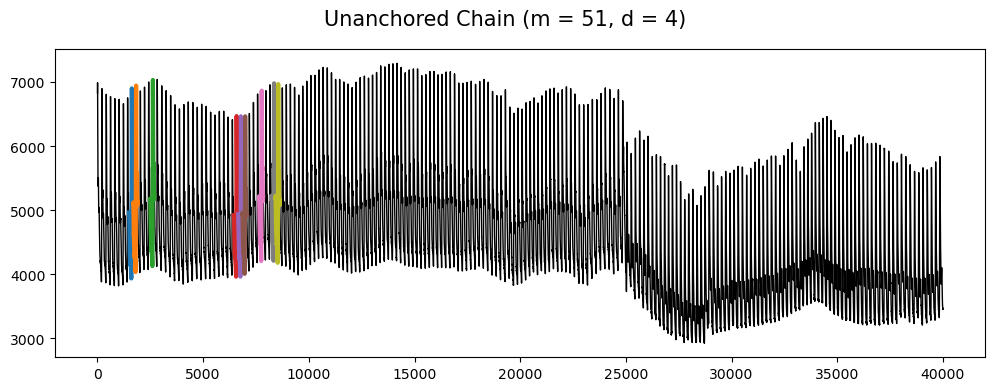

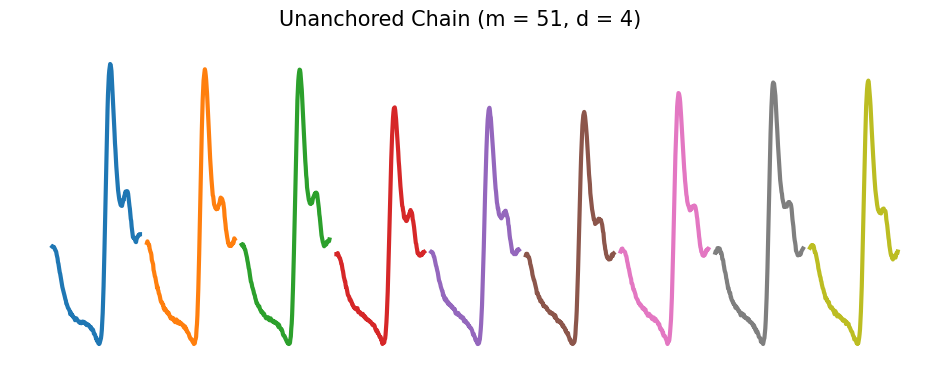

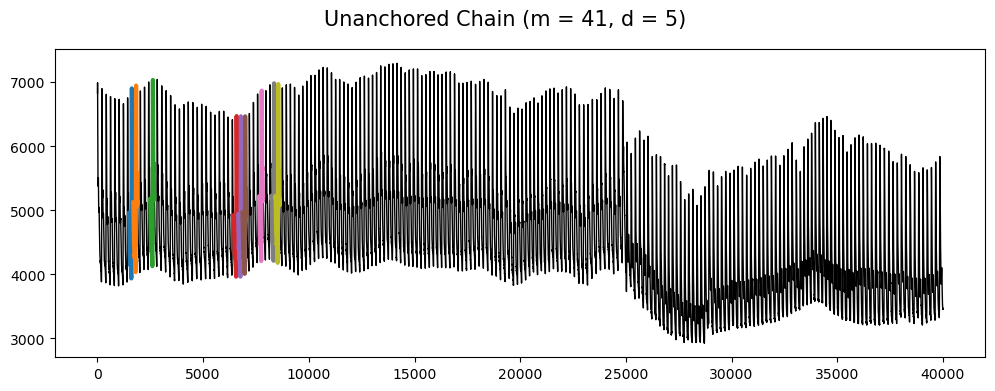

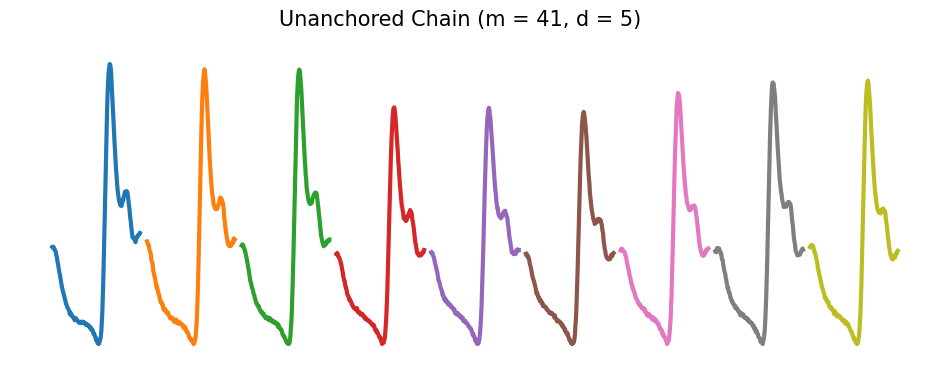

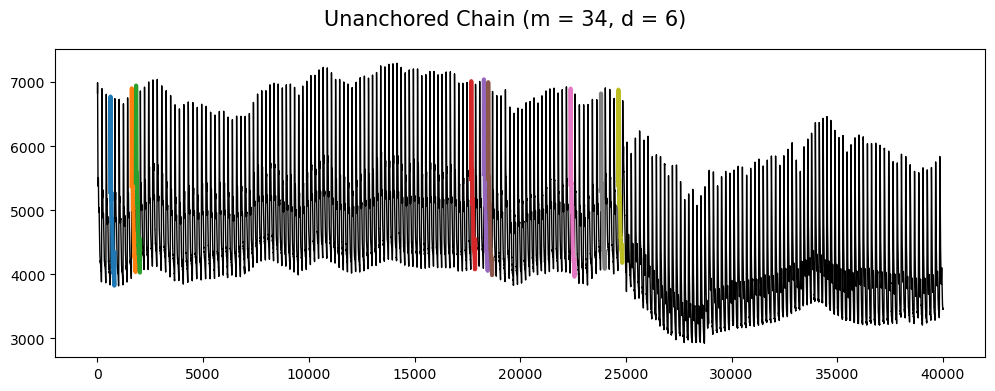

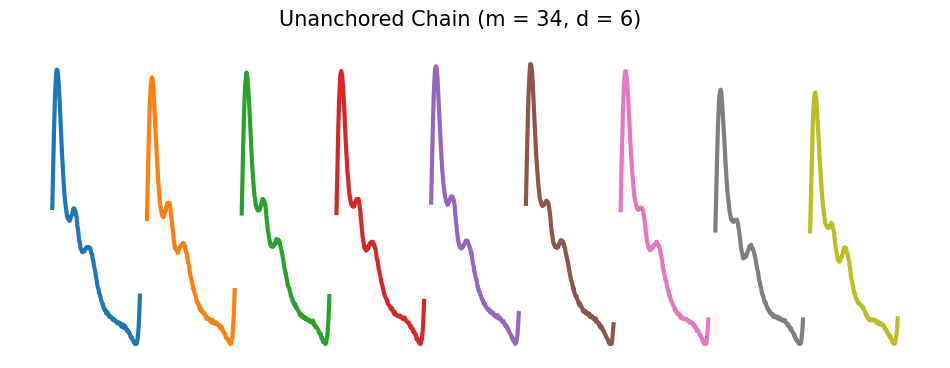

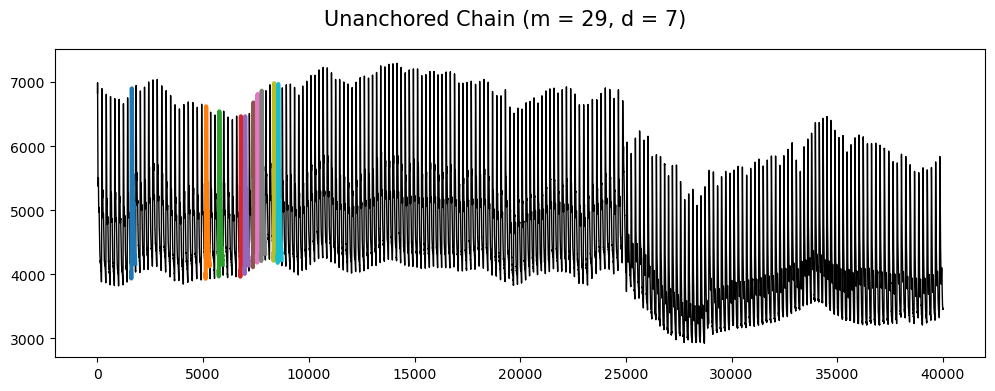

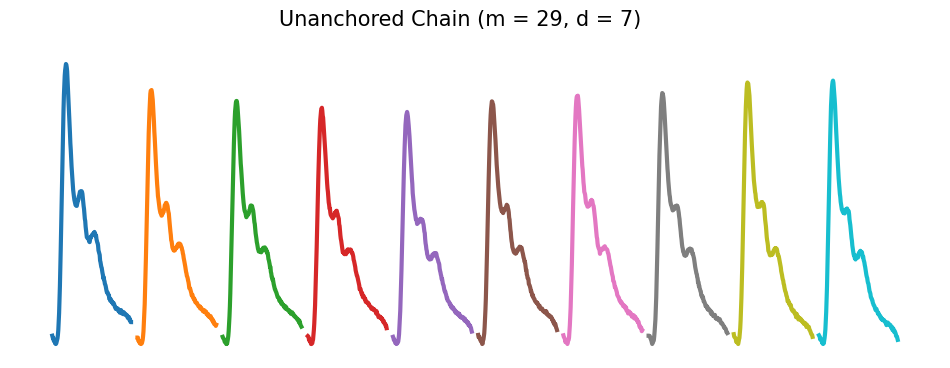

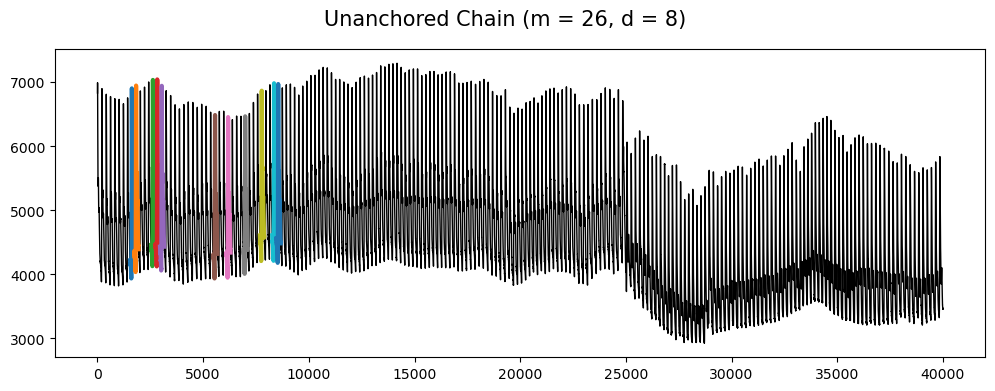

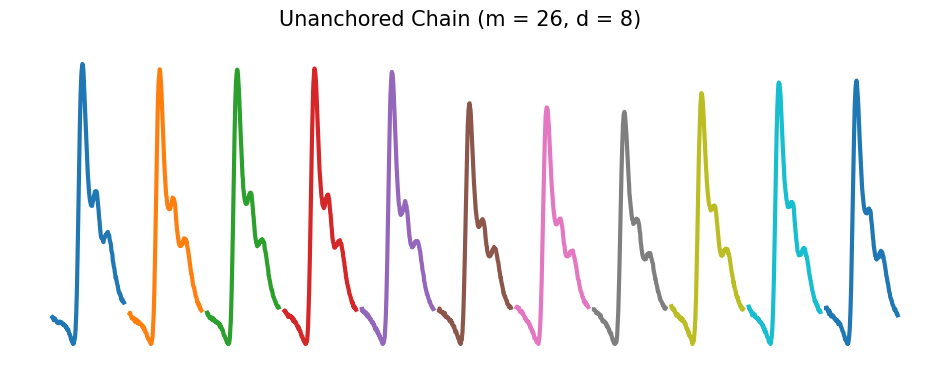

In [8]:
# visualize:
for d in ds:
    m = round((target_r-1)/d) + 1
    file_name = data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    T, m, d, mp, all_chain_set, unanchored_chain = results.load(file_path + ".npy")
    
    print(unanchored_chain)
    plot = visualize.chain_unanchored(T, unanchored_chain, m, d)
    plot.savefig(file_path + "_unanchored")
    plot = visualize.chain_unanchored_snippets(T, unanchored_chain, m, d)
    plot.savefig(file_path + "_unanchored_snippets")